# Collect Tweets into MongoDB

## Install Python libraries

You may need to restart your Jupyter Notebook instance after installed those libraries.

In [1]:
!pip install pymongo

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install pymongo[srv]

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install dnspython

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [4]:
!pip install tweepy

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [5]:
!pip install twitter

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


## Import Python libraries

In [6]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

##  Load the Authorization Info

Save database connection info and API Keys in a config.ini file and use the configparse to load the authorization info. 

In [7]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secrete']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secrete']

mongod_connect = config['mymongo']['connection']

## Connect to the MongoDB Cluster

In [8]:
client = MongoClient(mongod_connect)
db = client.gp7 # use or create a database named demo
tweet_collection = db.lab11 #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

## Use the Streaming API to Collect Tweets

Authorize the Stream API 

In [4]:
stream_auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
stream_auth.set_access_token(OAUTH_TOKEN, OATH_TOKEN_SECRET)

strem_api = tweepy.API(stream_auth)

Define the query for the Stream API

In [5]:
track = ['election'] # define the keywords, tweets contain election

locations = [-78.9326449,38.4150904,-78.8816972,38.4450731] #defin the location, in Harrisonburg, VA

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> OR </span> are located in Harrisonburg, VA

In [ ]:
class MyStreamListener(tweepy.StreamListener):
    def on_status(self, status):
        print (status.id_str)
        try:
            tweet_collection.insert_one(status._json)
        except:
            pass
  
    def on_error(self, status_code):
        if status_code == 420:
            #returning False in on_data disconnects the stream
            return False
myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth = strem_api.auth, listener=myStreamListener)
myStream.filter(track=track)#  (locations = locations)   #Use either track or locations

## Use the REST API to Collect Tweets

Authorize the REST API 

In [9]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

Define the query for the REST API

In [10]:
count = 100 #number of returned tweets, default and max is 100
geocode = "37.5245782,-77.6333483,150mi"  # defin the location, in Harrisonburg, VA
q = "covid19"                               #define the keywords, tweets contain election

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> AND </span> are located in Harrisonburg, VA

In [11]:
search_results = rest_api.search.tweets( count=count,q=q, geocode=geocode) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

'Thu Nov 12 20:32:32 +0000 2020'
'Thu Nov 12 20:32:31 +0000 2020'
'Thu Nov 12 20:32:28 +0000 2020'
'Thu Nov 12 20:32:26 +0000 2020'
'Thu Nov 12 20:32:24 +0000 2020'
'Thu Nov 12 20:32:24 +0000 2020'
'Thu Nov 12 20:32:21 +0000 2020'
'Thu Nov 12 20:32:18 +0000 2020'
'Thu Nov 12 20:32:14 +0000 2020'
'Thu Nov 12 20:32:09 +0000 2020'
'Thu Nov 12 20:32:07 +0000 2020'
'Thu Nov 12 20:32:02 +0000 2020'
'Thu Nov 12 20:31:55 +0000 2020'
'Thu Nov 12 20:31:53 +0000 2020'
'Thu Nov 12 20:31:46 +0000 2020'
'Thu Nov 12 20:31:45 +0000 2020'
'Thu Nov 12 20:31:35 +0000 2020'
'Thu Nov 12 20:31:31 +0000 2020'
'Thu Nov 12 20:31:27 +0000 2020'
'Thu Nov 12 20:31:26 +0000 2020'
'Thu Nov 12 20:31:23 +0000 2020'
'Thu Nov 12 20:31:11 +0000 2020'
'Thu Nov 12 20:31:11 +0000 2020'
'Thu Nov 12 20:31:07 +0000 2020'
'Thu Nov 12 20:31:05 +0000 2020'
'Thu Nov 12 20:31:01 +0000 2020'
'Thu Nov 12 20:30:51 +0000 2020'
'Thu Nov 12 20:30:50 +0000 2020'
'Thu Nov 12 20:30:49 +0000 2020'
'Thu Nov 12 20:30:46 +0000 2020'
'Thu Nov 1

Continue fetching early tweets with the same query. 
<p><span style="color:red;font-weight:bold">YOU WILL REACH YOUR RATE LIMIT VERY FAST</span></p>

In [12]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                        geocode=geocode, max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Thu Nov 12 20:24:47 +0000 2020'
'Thu Nov 12 20:24:46 +0000 2020'
'Thu Nov 12 20:24:45 +0000 2020'
'Thu Nov 12 20:24:41 +0000 2020'
'Thu Nov 12 20:24:23 +0000 2020'
'Thu Nov 12 20:24:18 +0000 2020'
'Thu Nov 12 20:24:05 +0000 2020'
'Thu Nov 12 20:24:02 +0000 2020'
'Thu Nov 12 20:24:00 +0000 2020'
'Thu Nov 12 20:23:56 +0000 2020'
'Thu Nov 12 20:23:54 +0000 2020'
'Thu Nov 12 20:23:43 +0000 2020'
'Thu Nov 12 20:23:36 +0000 2020'
'Thu Nov 12 20:23:35 +0000 2020'
'Thu Nov 12 20:23:32 +0000 2020'
'Thu Nov 12 20:23:27 +0000 2020'
'Thu Nov 12 20:23:19 +0000 2020'
'Thu Nov 12 20:23:07 +0000 2020'
'Thu Nov 12 20:23:04 +0000 2020'
'Thu Nov 12 20:22:56 +0000 2020'
'Thu Nov 12 20:22:55 +0000 2020'
'Thu Nov 12 20:22:49 +0000 2020'
'Thu Nov 12 20:22:46 +0000 2020'
'Thu Nov 12 20:22:44 +0000 2020'
'Thu Nov 12 20:22:44 +0000 2020'
'Thu Nov 12 20:22:43 +0000 2020'
'Thu Nov 12 20:22:40 +0000 2020'
'Thu Nov 12 20:22:40 +0000 2020'
'Thu Nov 12 20:22:40 +0000 2020'
'Thu Nov 12 20:22:40 +0000 2020'
'Thu Nov 1

'Thu Nov 12 20:00:00 +0000 2020'
'Thu Nov 12 20:00:00 +0000 2020'
'Thu Nov 12 20:00:00 +0000 2020'
'Thu Nov 12 19:59:58 +0000 2020'
'Thu Nov 12 19:59:47 +0000 2020'
'Thu Nov 12 19:59:43 +0000 2020'
'Thu Nov 12 19:59:42 +0000 2020'
'Thu Nov 12 19:59:41 +0000 2020'
'Thu Nov 12 19:59:39 +0000 2020'
'Thu Nov 12 19:59:32 +0000 2020'
'Thu Nov 12 19:59:28 +0000 2020'
'Thu Nov 12 19:59:27 +0000 2020'
'Thu Nov 12 19:59:23 +0000 2020'
'Thu Nov 12 19:59:21 +0000 2020'
'Thu Nov 12 19:59:20 +0000 2020'
'Thu Nov 12 19:59:18 +0000 2020'
'Thu Nov 12 19:58:43 +0000 2020'
'Thu Nov 12 19:58:31 +0000 2020'
'Thu Nov 12 19:58:30 +0000 2020'
'Thu Nov 12 19:58:24 +0000 2020'
'Thu Nov 12 19:58:12 +0000 2020'
'Thu Nov 12 19:58:10 +0000 2020'
'Thu Nov 12 19:58:07 +0000 2020'
'Thu Nov 12 19:58:07 +0000 2020'
'Thu Nov 12 19:58:00 +0000 2020'
'Thu Nov 12 19:58:00 +0000 2020'
'Thu Nov 12 19:57:53 +0000 2020'
'Thu Nov 12 19:57:38 +0000 2020'
'Thu Nov 12 19:57:36 +0000 2020'
'Thu Nov 12 19:57:35 +0000 2020'
'Thu Nov 1

'Thu Nov 12 19:30:42 +0000 2020'
'Thu Nov 12 19:30:37 +0000 2020'
'Thu Nov 12 19:30:35 +0000 2020'
'Thu Nov 12 19:30:33 +0000 2020'
'Thu Nov 12 19:30:27 +0000 2020'
'Thu Nov 12 19:30:14 +0000 2020'
'Thu Nov 12 19:30:13 +0000 2020'
'Thu Nov 12 19:30:08 +0000 2020'
'Thu Nov 12 19:30:06 +0000 2020'
'Thu Nov 12 19:30:04 +0000 2020'
'Thu Nov 12 19:30:02 +0000 2020'
'Thu Nov 12 19:30:01 +0000 2020'
'Thu Nov 12 19:29:54 +0000 2020'
'Thu Nov 12 19:29:43 +0000 2020'
'Thu Nov 12 19:29:29 +0000 2020'
'Thu Nov 12 19:29:28 +0000 2020'
'Thu Nov 12 19:29:11 +0000 2020'
'Thu Nov 12 19:29:03 +0000 2020'
'Thu Nov 12 19:28:59 +0000 2020'
'Thu Nov 12 19:28:56 +0000 2020'
'Thu Nov 12 19:28:43 +0000 2020'
'Thu Nov 12 19:28:37 +0000 2020'
'Thu Nov 12 19:28:35 +0000 2020'
'Thu Nov 12 19:28:34 +0000 2020'
'Thu Nov 12 19:28:33 +0000 2020'
'Thu Nov 12 19:28:30 +0000 2020'
'Thu Nov 12 19:28:29 +0000 2020'
'Thu Nov 12 19:28:28 +0000 2020'
'Thu Nov 12 19:28:21 +0000 2020'
'Thu Nov 12 19:28:20 +0000 2020'
'Thu Nov 1

'Thu Nov 12 19:06:42 +0000 2020'
'Thu Nov 12 19:06:38 +0000 2020'
'Thu Nov 12 19:06:33 +0000 2020'
'Thu Nov 12 19:06:30 +0000 2020'
'Thu Nov 12 19:06:08 +0000 2020'
'Thu Nov 12 19:06:04 +0000 2020'
'Thu Nov 12 19:06:04 +0000 2020'
'Thu Nov 12 19:05:45 +0000 2020'
'Thu Nov 12 19:05:45 +0000 2020'
'Thu Nov 12 19:05:43 +0000 2020'
'Thu Nov 12 19:05:33 +0000 2020'
'Thu Nov 12 19:05:29 +0000 2020'
'Thu Nov 12 19:05:28 +0000 2020'
'Thu Nov 12 19:05:25 +0000 2020'
'Thu Nov 12 19:05:09 +0000 2020'
'Thu Nov 12 19:05:09 +0000 2020'
'Thu Nov 12 19:05:07 +0000 2020'
'Thu Nov 12 19:05:03 +0000 2020'
'Thu Nov 12 19:05:01 +0000 2020'
'Thu Nov 12 19:04:50 +0000 2020'
'Thu Nov 12 19:04:43 +0000 2020'
'Thu Nov 12 19:04:27 +0000 2020'
'Thu Nov 12 19:04:17 +0000 2020'
'Thu Nov 12 19:04:10 +0000 2020'
'Thu Nov 12 19:04:08 +0000 2020'
'Thu Nov 12 19:04:02 +0000 2020'
'Thu Nov 12 19:04:00 +0000 2020'
'Thu Nov 12 19:03:54 +0000 2020'
'Thu Nov 12 19:03:46 +0000 2020'
'Thu Nov 12 19:03:41 +0000 2020'
'Thu Nov 1

'Thu Nov 12 18:43:07 +0000 2020'
'Thu Nov 12 18:43:07 +0000 2020'
'Thu Nov 12 18:43:02 +0000 2020'
'Thu Nov 12 18:42:58 +0000 2020'
'Thu Nov 12 18:42:48 +0000 2020'
'Thu Nov 12 18:42:42 +0000 2020'
'Thu Nov 12 18:42:41 +0000 2020'
'Thu Nov 12 18:42:28 +0000 2020'
'Thu Nov 12 18:42:25 +0000 2020'
'Thu Nov 12 18:42:25 +0000 2020'
'Thu Nov 12 18:42:19 +0000 2020'
'Thu Nov 12 18:42:18 +0000 2020'
'Thu Nov 12 18:42:10 +0000 2020'
'Thu Nov 12 18:42:09 +0000 2020'
'Thu Nov 12 18:42:02 +0000 2020'
'Thu Nov 12 18:42:00 +0000 2020'
'Thu Nov 12 18:41:59 +0000 2020'
'Thu Nov 12 18:41:58 +0000 2020'
'Thu Nov 12 18:41:54 +0000 2020'
'Thu Nov 12 18:41:54 +0000 2020'
'Thu Nov 12 18:41:47 +0000 2020'
'Thu Nov 12 18:41:33 +0000 2020'
'Thu Nov 12 18:41:32 +0000 2020'
'Thu Nov 12 18:41:31 +0000 2020'
'Thu Nov 12 18:41:29 +0000 2020'
'Thu Nov 12 18:41:25 +0000 2020'
'Thu Nov 12 18:41:25 +0000 2020'
'Thu Nov 12 18:41:20 +0000 2020'
'Thu Nov 12 18:41:14 +0000 2020'
'Thu Nov 12 18:40:58 +0000 2020'
'Thu Nov 1

'Thu Nov 12 18:25:03 +0000 2020'
'Thu Nov 12 18:25:01 +0000 2020'
'Thu Nov 12 18:24:51 +0000 2020'
'Thu Nov 12 18:24:51 +0000 2020'
'Thu Nov 12 18:24:47 +0000 2020'
'Thu Nov 12 18:24:44 +0000 2020'
'Thu Nov 12 18:24:43 +0000 2020'
'Thu Nov 12 18:24:43 +0000 2020'
'Thu Nov 12 18:24:39 +0000 2020'
'Thu Nov 12 18:24:39 +0000 2020'
'Thu Nov 12 18:24:37 +0000 2020'
'Thu Nov 12 18:24:35 +0000 2020'
'Thu Nov 12 18:24:35 +0000 2020'
'Thu Nov 12 18:24:32 +0000 2020'
'Thu Nov 12 18:24:24 +0000 2020'
'Thu Nov 12 18:24:16 +0000 2020'
'Thu Nov 12 18:24:15 +0000 2020'
'Thu Nov 12 18:24:09 +0000 2020'
'Thu Nov 12 18:24:04 +0000 2020'
'Thu Nov 12 18:24:03 +0000 2020'
'Thu Nov 12 18:23:57 +0000 2020'
'Thu Nov 12 18:23:53 +0000 2020'
'Thu Nov 12 18:23:50 +0000 2020'
'Thu Nov 12 18:23:49 +0000 2020'
'Thu Nov 12 18:23:49 +0000 2020'
'Thu Nov 12 18:23:43 +0000 2020'
'Thu Nov 12 18:23:37 +0000 2020'
'Thu Nov 12 18:23:36 +0000 2020'
'Thu Nov 12 18:23:35 +0000 2020'
'Thu Nov 12 18:23:34 +0000 2020'
'Thu Nov 1

'Thu Nov 12 18:15:45 +0000 2020'
'Thu Nov 12 18:15:44 +0000 2020'
'Thu Nov 12 18:15:44 +0000 2020'
'Thu Nov 12 18:15:42 +0000 2020'
'Thu Nov 12 18:15:42 +0000 2020'
'Thu Nov 12 18:15:41 +0000 2020'
'Thu Nov 12 18:15:41 +0000 2020'
'Thu Nov 12 18:15:41 +0000 2020'
'Thu Nov 12 18:15:38 +0000 2020'
'Thu Nov 12 18:15:36 +0000 2020'
'Thu Nov 12 18:15:34 +0000 2020'
'Thu Nov 12 18:15:33 +0000 2020'
'Thu Nov 12 18:15:31 +0000 2020'
'Thu Nov 12 18:15:29 +0000 2020'
'Thu Nov 12 18:15:28 +0000 2020'
'Thu Nov 12 18:15:28 +0000 2020'
'Thu Nov 12 18:15:27 +0000 2020'
'Thu Nov 12 18:15:25 +0000 2020'
'Thu Nov 12 18:15:25 +0000 2020'
'Thu Nov 12 18:15:20 +0000 2020'
'Thu Nov 12 18:15:19 +0000 2020'
'Thu Nov 12 18:15:18 +0000 2020'
'Thu Nov 12 18:15:17 +0000 2020'
'Thu Nov 12 18:15:16 +0000 2020'
'Thu Nov 12 18:15:16 +0000 2020'
'Thu Nov 12 18:15:15 +0000 2020'
'Thu Nov 12 18:15:14 +0000 2020'
'Thu Nov 12 18:15:13 +0000 2020'
'Thu Nov 12 18:15:10 +0000 2020'
'Thu Nov 12 18:15:09 +0000 2020'
'Thu Nov 1

'Thu Nov 12 18:00:01 +0000 2020'
'Thu Nov 12 18:00:01 +0000 2020'
'Thu Nov 12 18:00:00 +0000 2020'
'Thu Nov 12 18:00:00 +0000 2020'
'Thu Nov 12 17:59:59 +0000 2020'
'Thu Nov 12 17:59:56 +0000 2020'
'Thu Nov 12 17:59:52 +0000 2020'
'Thu Nov 12 17:59:48 +0000 2020'
'Thu Nov 12 17:59:44 +0000 2020'
'Thu Nov 12 17:59:44 +0000 2020'
'Thu Nov 12 17:59:43 +0000 2020'
'Thu Nov 12 17:59:36 +0000 2020'
'Thu Nov 12 17:59:30 +0000 2020'
'Thu Nov 12 17:59:29 +0000 2020'
'Thu Nov 12 17:59:28 +0000 2020'
'Thu Nov 12 17:59:16 +0000 2020'
'Thu Nov 12 17:59:12 +0000 2020'
'Thu Nov 12 17:59:08 +0000 2020'
'Thu Nov 12 17:59:07 +0000 2020'
'Thu Nov 12 17:59:06 +0000 2020'
'Thu Nov 12 17:59:05 +0000 2020'
'Thu Nov 12 17:59:04 +0000 2020'
'Thu Nov 12 17:59:02 +0000 2020'
'Thu Nov 12 17:59:00 +0000 2020'
'Thu Nov 12 17:58:53 +0000 2020'
'Thu Nov 12 17:58:52 +0000 2020'
'Thu Nov 12 17:58:50 +0000 2020'
'Thu Nov 12 17:58:49 +0000 2020'
'Thu Nov 12 17:58:46 +0000 2020'
'Thu Nov 12 17:58:45 +0000 2020'
'Thu Nov 1

'Thu Nov 12 17:38:39 +0000 2020'
'Thu Nov 12 17:38:38 +0000 2020'
'Thu Nov 12 17:38:33 +0000 2020'
'Thu Nov 12 17:38:09 +0000 2020'
'Thu Nov 12 17:38:08 +0000 2020'
'Thu Nov 12 17:38:07 +0000 2020'
'Thu Nov 12 17:38:04 +0000 2020'
'Thu Nov 12 17:38:00 +0000 2020'
'Thu Nov 12 17:37:57 +0000 2020'
'Thu Nov 12 17:37:53 +0000 2020'
'Thu Nov 12 17:37:48 +0000 2020'
'Thu Nov 12 17:37:39 +0000 2020'
'Thu Nov 12 17:37:26 +0000 2020'
'Thu Nov 12 17:37:22 +0000 2020'
'Thu Nov 12 17:37:08 +0000 2020'
'Thu Nov 12 17:37:08 +0000 2020'
'Thu Nov 12 17:37:06 +0000 2020'
'Thu Nov 12 17:37:01 +0000 2020'
'Thu Nov 12 17:37:00 +0000 2020'
'Thu Nov 12 17:37:00 +0000 2020'
'Thu Nov 12 17:36:54 +0000 2020'
'Thu Nov 12 17:36:48 +0000 2020'
'Thu Nov 12 17:36:47 +0000 2020'
'Thu Nov 12 17:36:46 +0000 2020'
'Thu Nov 12 17:36:38 +0000 2020'
'Thu Nov 12 17:36:34 +0000 2020'
'Thu Nov 12 17:36:33 +0000 2020'
'Thu Nov 12 17:36:32 +0000 2020'
'Thu Nov 12 17:36:31 +0000 2020'
'Thu Nov 12 17:36:23 +0000 2020'
'Thu Nov 1

'Thu Nov 12 17:19:08 +0000 2020'
'Thu Nov 12 17:19:03 +0000 2020'
'Thu Nov 12 17:19:02 +0000 2020'
'Thu Nov 12 17:19:00 +0000 2020'
'Thu Nov 12 17:19:00 +0000 2020'
'Thu Nov 12 17:18:57 +0000 2020'
'Thu Nov 12 17:18:54 +0000 2020'
'Thu Nov 12 17:18:52 +0000 2020'
'Thu Nov 12 17:18:51 +0000 2020'
'Thu Nov 12 17:18:48 +0000 2020'
'Thu Nov 12 17:18:42 +0000 2020'
'Thu Nov 12 17:18:42 +0000 2020'
'Thu Nov 12 17:18:33 +0000 2020'
'Thu Nov 12 17:18:32 +0000 2020'
'Thu Nov 12 17:18:31 +0000 2020'
'Thu Nov 12 17:18:27 +0000 2020'
'Thu Nov 12 17:18:22 +0000 2020'
'Thu Nov 12 17:18:19 +0000 2020'
'Thu Nov 12 17:18:18 +0000 2020'
'Thu Nov 12 17:18:13 +0000 2020'
'Thu Nov 12 17:18:13 +0000 2020'
'Thu Nov 12 17:18:12 +0000 2020'
'Thu Nov 12 17:18:11 +0000 2020'
'Thu Nov 12 17:18:03 +0000 2020'
'Thu Nov 12 17:17:50 +0000 2020'
'Thu Nov 12 17:17:48 +0000 2020'
'Thu Nov 12 17:17:43 +0000 2020'
'Thu Nov 12 17:17:42 +0000 2020'
'Thu Nov 12 17:17:37 +0000 2020'
'Thu Nov 12 17:17:32 +0000 2020'
'Thu Nov 1

'Thu Nov 12 16:58:30 +0000 2020'
'Thu Nov 12 16:58:30 +0000 2020'
'Thu Nov 12 16:58:29 +0000 2020'
'Thu Nov 12 16:58:27 +0000 2020'
'Thu Nov 12 16:58:16 +0000 2020'
'Thu Nov 12 16:58:10 +0000 2020'
'Thu Nov 12 16:58:07 +0000 2020'
'Thu Nov 12 16:58:07 +0000 2020'
'Thu Nov 12 16:57:45 +0000 2020'
'Thu Nov 12 16:57:45 +0000 2020'
'Thu Nov 12 16:57:42 +0000 2020'
'Thu Nov 12 16:57:38 +0000 2020'
'Thu Nov 12 16:57:19 +0000 2020'
'Thu Nov 12 16:57:15 +0000 2020'
'Thu Nov 12 16:57:11 +0000 2020'
'Thu Nov 12 16:57:07 +0000 2020'
'Thu Nov 12 16:57:07 +0000 2020'
'Thu Nov 12 16:57:05 +0000 2020'
'Thu Nov 12 16:57:00 +0000 2020'
'Thu Nov 12 16:56:51 +0000 2020'
'Thu Nov 12 16:56:50 +0000 2020'
'Thu Nov 12 16:56:48 +0000 2020'
'Thu Nov 12 16:56:45 +0000 2020'
'Thu Nov 12 16:56:43 +0000 2020'
'Thu Nov 12 16:56:42 +0000 2020'
'Thu Nov 12 16:56:24 +0000 2020'
'Thu Nov 12 16:56:20 +0000 2020'
'Thu Nov 12 16:56:18 +0000 2020'
'Thu Nov 12 16:56:03 +0000 2020'
'Thu Nov 12 16:55:45 +0000 2020'
'Thu Nov 1

'Thu Nov 12 16:40:59 +0000 2020'
'Thu Nov 12 16:40:59 +0000 2020'
'Thu Nov 12 16:40:55 +0000 2020'
'Thu Nov 12 16:40:49 +0000 2020'
'Thu Nov 12 16:40:48 +0000 2020'
'Thu Nov 12 16:40:48 +0000 2020'
'Thu Nov 12 16:40:45 +0000 2020'
'Thu Nov 12 16:40:42 +0000 2020'
'Thu Nov 12 16:40:37 +0000 2020'
'Thu Nov 12 16:40:33 +0000 2020'
'Thu Nov 12 16:40:31 +0000 2020'
'Thu Nov 12 16:40:25 +0000 2020'
'Thu Nov 12 16:40:24 +0000 2020'
'Thu Nov 12 16:40:21 +0000 2020'
'Thu Nov 12 16:40:18 +0000 2020'
'Thu Nov 12 16:40:17 +0000 2020'
'Thu Nov 12 16:40:17 +0000 2020'
'Thu Nov 12 16:40:17 +0000 2020'
'Thu Nov 12 16:40:13 +0000 2020'
'Thu Nov 12 16:40:09 +0000 2020'
'Thu Nov 12 16:40:07 +0000 2020'
'Thu Nov 12 16:40:03 +0000 2020'
'Thu Nov 12 16:39:59 +0000 2020'
'Thu Nov 12 16:39:59 +0000 2020'
'Thu Nov 12 16:39:55 +0000 2020'
'Thu Nov 12 16:39:55 +0000 2020'
'Thu Nov 12 16:39:53 +0000 2020'
'Thu Nov 12 16:39:51 +0000 2020'
'Thu Nov 12 16:39:49 +0000 2020'
'Thu Nov 12 16:39:42 +0000 2020'
'Thu Nov 1

KeyboardInterrupt: 

## View the Collected Tweets

Print the number of tweets and unique twitter users

In [13]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users 

3138
2877


Create a text index and print the Tweets containing specific keywords. 

In [14]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index


'text_index'

Create a cursor to query tweets with the created index

In [15]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "covid19"}}) # return tweets contain vote

Use pprint to display tweets

In [16]:

for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: Mike Simmons
text: #COVID19 is NOT like the flu. #COVID19 is NOT about just surviving it. What scares me most about #COVID19 is dimini… https://t.co/JP9HsmWuQU
----
name: University of California Health
text: 3/7  25 #COVID19 @UofCAHealth inpatients are on a ventilator.  3 COVID19 inpatients are on extracorporeal membrane… https://t.co/Z7FMB02PbB
----
name: COG
text: Get the latest on regional #COVID19 coordination and resources, including information on the #COVID19 multi-state d… https://t.co/NRLLoGKr9P
----
name: Kimberly #StayHome Ratliff
text: RT @mitdoc: #Truth #COVID19
----
name: Vincent Spadoni
text: #COVID19 https://t.co/Ed8r6nDwF7
----
name: Julie Crow
text: #COVID19 https://t.co/5NYIQo2jz4
----
name: Backbone Bey 💜
text: @JoyAnnReid These people want to get covid19.
----
name: Priscilla Penkert
text: #COVID19 https://t.co/9o4Vt00mY6
----
name: Mitchell Shapiro
text: @JoJoFromJerz Who knew that water could be so wet? #COVID19
----
name: Jinger Snapp-Laplace
text: #

In [12]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "vote"}}) # return tweets contain vote

Use pandas to display tweets

In [13]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,lang,timestamp_ms,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,extended_tweet,possibly_sensitive,metadata,display_text_range
0,5f9970e6ea281243abe9e85f,Wed Oct 28 13:23:45 +0000 2020,1321442530572066817,1321442530572066817,RT @Mia4MD: Early Voting is happening NOW in M...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,None,NaN,...,en,1603891425160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5f9970eaea281243abe9e8c9,Wed Oct 28 13:23:49 +0000 2020,1321442549718945792,1321442549718945792,RT @Amy_Siskind: TEXAS‼️ - an astounding 7.8 m...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,None,NaN,...,en,1603891429725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5f9970efea281243abe9e939,Wed Oct 28 13:23:54 +0000 2020,1321442568459198467,1321442568459198467,KEEP Pres: TRUMP\nCHANGE Senate: GADE\nHOPE Co...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",True,NaN,None,NaN,...,en,1603891434193,1.321379e+18,1321378894327484416,{'created_at': 'Wed Oct 28 09:10:53 +0000 2020...,"{'url': 'https://t.co/g07jyouj2s', 'expanded':...",{'full_text': 'KEEP Pres: TRUMP CHANGE Senate:...,NaN,NaN,NaN
3,5f997133ea281243abe9ea5a,Wed Oct 28 13:25:02 +0000 2020,1321442853244018690,1321442853244018690,#VOTE,"<a href=""https://mobile.twitter.com"" rel=""nofo...",False,NaN,None,NaN,...,und,1603891502091,1.321441e+18,1321440905098874882,{'created_at': 'Wed Oct 28 13:17:17 +0000 2020...,"{'url': 'https://t.co/SiYtZzvyXq', 'expanded':...",NaN,NaN,NaN,NaN
4,5f9970e6ea281243abe9e868,Wed Oct 28 13:23:45 +0000 2020,1321442531532435457,1321442531532435457,#Vote,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,None,NaN,...,und,1603891425389,1.321180e+18,1321179867052986368,{'created_at': 'Tue Oct 27 20:00:01 +0000 2020...,"{'url': 'https://t.co/VhdpN9qfYf', 'expanded':...",NaN,NaN,NaN,NaN
5,5f9970f5ea281243abe9e9b4,Wed Oct 28 13:24:00 +0000 2020,1321442594174455809,1321442594174455809,RT @grantstern: Why is ⁦@MayorGimenez⁩ against...,"<a href=""http://twitter.com/download/android"" ...",False,NaN,None,NaN,...,en,1603891440324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,5f9970eaea281243abe9e8c6,Wed Oct 28 13:23:49 +0000 2020,1321442549379334144,1321442549379334144,RT @raquelmiranda89: Shelby County: you have t...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,None,NaN,...,en,1603891429644,1.316336e+18,1316335746702340097,{'created_at': 'Wed Oct 14 11:11:13 +0000 2020...,"{'url': 'https://t.co/AbysBKfi2s', 'expanded':...",NaN,NaN,NaN,NaN
7,5f9970f9ea281243abe9ea15,Wed Oct 28 13:24:04 +0000 2020,1321442610347737088,1321442610347737088,I'm not voting until a celebrity tweets a pict...,"<a href=""http://twitter.com/download/android"" ...",True,NaN,None,NaN,...,en,1603891444180,NaN,NaN,NaN,NaN,{'full_text': 'I'm not voting until a celebrit...,NaN,NaN,NaN
8,5f997133ea281243abe9ea5b,Wed Oct 28 13:25:02 +0000 2020,1321442853617164289,1321442853617164289,RT @kkjjPNW: You do not have to vote by mail i...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,None,NaN,...,en,1603891502180,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN
9,5f9970faea281243abe9ea39,Wed Oct 28 13:24:05 +0000 2020,1321442617138286594,1321442617138286594,RT @Carnage4Life: It’s easier for a white pers...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,None,NaN,...,en,1603891445799,1.320028e+18,1320027534789140480,{'created_at': 'Sat Oct 24 15:41:03 +0000 2020...,"{'url': 'https://t.co/8u0q776vmb', 'expanded':...",NaN,NaN,NaN,NaN


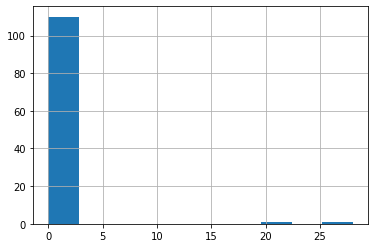

In [14]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count